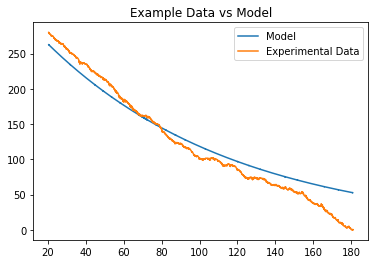

In [26]:
import openpyxl
import numpy as np 
from scipy.misc import derivative
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from openpyxl import load_workbook
# Give the location of the file
path1 = "./pullf_back1.xlsx"
wb = load_workbook(path1 , data_only = True)  # Work Book
ws = wb['pullf_back1']  # Work Sheet
pullf1 =ws['C']  # Column
pullf1 = [pullf1[x].value for x in range(len(pullf1))] 
path2 = "./pullx_back1.xlsx"
wb = load_workbook(path2 , data_only = True)  # Work Book
ws = wb['pullx_back1']  # Work Sheet
dist1=ws['C']
dist1 = [dist1[x].value for x in range(len(dist1))]
path3 = "./pullf_fwd1.xlsx"
wb = load_workbook(path3 , data_only = True)  # Work Book
ws = wb['pullf_fwd1']  # Work Sheet
pullf2 =ws['C']  # Column
pullf2 = [pullf2[x].value for x in range(len(pullf2))]
pullf2.reverse()
path4 = "./pullx_fwd1.xlsx"
wb = load_workbook(path4 , data_only = True)  # Work Book
ws = wb['pullx_fwd1']  # Work Sheet
dist2=ws['C']
dist2 = [dist2[x].value for x in range(len(dist2))]
dist2.reverse()

dist=dist2+dist1
pullf=pullf2+pullf1

pmf = []
for i in range(0,1):
    pmf.append(0)
for i in range(1, len(dist2)):
    pmf.append((dist[i-1]-dist[i])*pullf[i] + pmf[i-1])
for i in range(len(dist2), len(dist)):
    pmf.append((dist[i]-dist[i-1])*pullf[i] + pmf[i-1])
    
data=np.column_stack((dist , pmf))
xdata=np.round(data[:,0] , 5)
ydata=np.round(data[:,1] , 5)
#dy=np.diff(ydata)
#dx=np.diff(xdata)
#force=dy/dx
#Define Function

def func(x,b0,a0,c0,b1,a1,c1): #input x in nm and b in nm^-1 output W m^-2 nm" ,b2,a2,c2
    return a0*np.exp(-b0*x)+c0+ a1*np.exp(-b1*x)+c1 #+ a2*np.exp(-b2*x)+c2
#Define Constants
#a0 = 1000 # m^-2 nm^-1
#al = 300 # w m^-2 nm^-1
#Curve fit data to model
popt, pcov = curve_fit(func, xdata,ydata,bounds=(0,[0.01,2500,1000,0.01,2500,1000])) # bounds=(1.5,14) ,2,2500,500
perr = np.sqrt(np.diag(pcov))
#Evaluate and Plot Function
potential = func(xdata, popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])
plt.plot(xdata, potential, label="Model")
#Plot the Data
plt.figure(1,dpi=120)
plt.plot(xdata,ydata, label="Experimental Data")
plt.title("Example Data vs Model")
plt.legend()
#workbook.close()
#plt.xlabel(rawdata[0][0])
#plt.ylabel(rawdata[0][1])
#plt.xlim(0,3)
#plt.ylim(0,2)
#plt.yscale("Linear")
#plt.xscale("Linear")

#int=np.trapz(ydata,xdata)
#data=np.array
#y=pmf(dist)
#print (column_list)

In [27]:
#numerical differentiation from model function
b0=popt[0]
a0=popt[1]
c0=popt[2]
b1=popt[3]
a1=popt[4]
c1=popt[5]
def energy(x): #input x in nm and b in nm^-1 output W m^-2 nm" ,b2,a2,c2
    return a0 *np.exp(-b0*x)+c0+ a1*np.exp(-b1*x)+c1 #+ a2*np.exp(-b2*x)+c2
force=-1*derivative(energy, xdata, dx=1e-5)

print(force)

[0.52715686 0.52719271 0.52725914 ... 2.62827012 2.62821755 2.62819127]


In [29]:
#symbolic differentiation from model potential
import sympy as sym
import math

def f(x):
    return a0*sym.exp(-b0*x)+c0+ a1*sym.exp(-b1*x)+c1


x = sym.symbols('x')

def fprime(x):
    return sym.diff(f(x))

print(fprime(x)) #This works.

DerivativeOfF = sym.lambdify(x,fprime(x),"numpy")
dist_linspace=np.linspace(20,180,10000)
force_linspace=-1*DerivativeOfF(dist_linspace)
potential_linspace = func(dist_linspace, popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])


-3.21859805923325*exp(-0.0099999999999999*x)


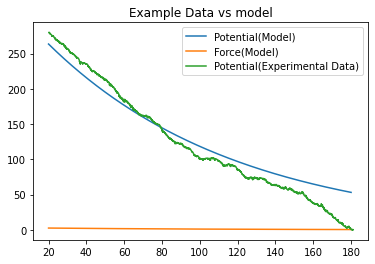

In [32]:
plt.plot(dist_linspace, potential_linspace, label="Potential(Model)")
plt.plot(xdata,ydata, label="Potential(Experimental Data)")
plt.plot(dist_linspace, force_linspace, label="Force(Model)")
#Plot the Data
plt.figure(1,dpi=120)
plt.title("Example Data vs model")
plt.legend()

In [33]:
index=[]
for i in range(0, len(dist_linspace)):
    index.append((i+1))
dist=np.round(dist_linspace, 5)
dist=list(dist)
#dist.reverse()
pround=np.round(potential_linspace, 5) 
fround=np.round(force_linspace, 5)
listp=list(pround)
listf=list(fround)
#listp.reverse()
#list.reverse()
with open("table4-4.txt","w") as f:
    f.write("# DATE: 2024-03-14  UNITS: real  CONTRIBUTOR: Riazi (header line) \n")
    f.write("# CG potential for A4-A4   (one or more comment or blank lines) \n")
    for (index,dist,listp,listf) in zip(index,dist,listp,listf):
        f.write("{0}\t{1}\t{2}\t{3}\n".format(index,dist,listp,listf))

In [ ]:
#exporting to excel by openpyxl
from openpyxl import workbook
#from openpyxl.cell import get_column_letter

workbook = Workbook() # the master workbook
#workbook.remove(workbook.active)
#workbook.create_sheet(title=potential)
output_file_name = "4-4.xlsx" # what "workbook" will be saved as

ws = workbook.active # all workbooks have one worksheet already selected as the default

ws.title = "potential"

potential=list(potential)
ws.append(potential)
#ws['A'] = potential #"=SUM(A1, A2)" # set up basic formula
#worksheet['B'] = force
wb.save(output_file_name)